In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile
import os

zip_path = r"C:\Users\KAMAL\Downloads\wine+quality.zip"
unzip_dir = r"C:\Users\KAMAL\Downloads\wine_quality_data"
os.makedirs(unzip_dir, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(unzip_dir)

red_path = os.path.join(unzip_dir, "winequality-red.csv")
white_path = os.path.join(unzip_dir, "winequality-white.csv")

df_red = pd.read_csv(red_path, sep=";")
df_white = pd.read_csv(white_path, sep=";")

df_red["wine_type"] = "red"
df_white["wine_type"] = "white"

df = pd.concat([df_red, df_white], axis=0).reset_index(drop=True)


In [37]:
print("Shape:", df.shape)
print("\nColumns:\n", df.columns)

print("\nMissing Values:\n", df.isnull().sum())
print("\nMissing Values (%):\n", (df.isnull().sum()/len(df))*100)

print("\nData Types:\n", df.dtypes)
print("\nSummary Statistics:\n", df.describe(include='all'))


Shape: (6497, 13)

Columns:
 Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'wine_type'],
      dtype='object')

Missing Values:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
wine_type               0
dtype: int64

Missing Values (%):
 fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
wine_

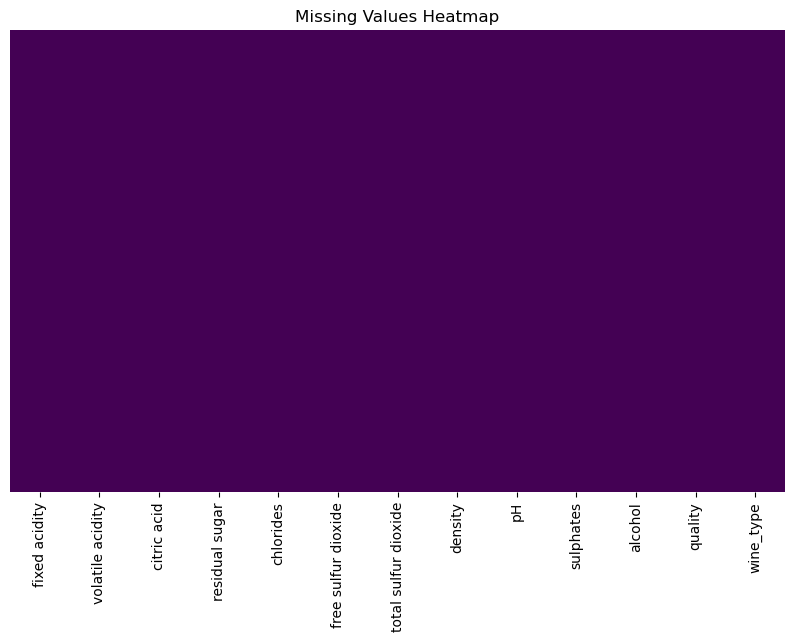

In [39]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Values Heatmap')
plt.show()


In [42]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

df_filled = df.copy()
num_cols = df_filled.select_dtypes(include=['number']).columns
cat_cols = df_filled.select_dtypes(exclude=['number']).columns

# Iterative Imputer for numerics
imputer = IterativeImputer(estimator=RandomForestRegressor(), random_state=0)
df_filled[num_cols] = imputer.fit_transform(df_filled[num_cols])

# Fill categorical with mode
for col in cat_cols:
    df_filled[col] = df_filled[col].fillna(df_filled[col].mode()[0])

print("\nMissing After Imputation:\n", df_filled.isnull().sum())



Missing After Imputation:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
wine_type               0
dtype: int64


<Figure size 1400x800 with 0 Axes>

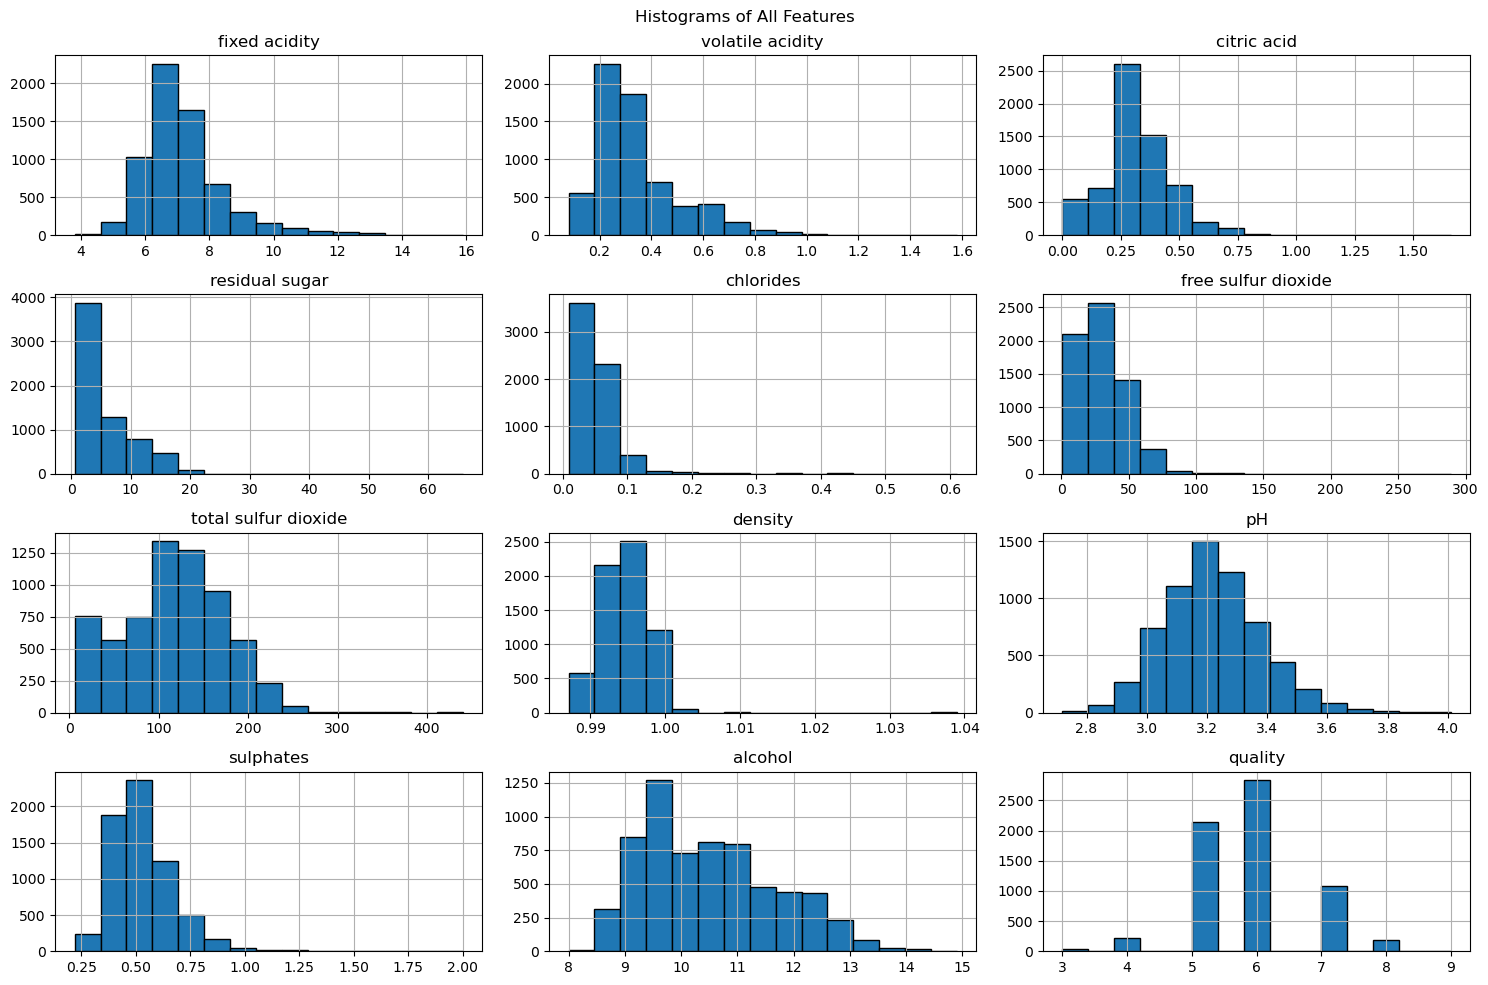

In [44]:
plt.figure(figsize=(14, 8))
df_filled.hist(bins=15, edgecolor='black', figsize=(15, 10))
plt.suptitle('Histograms of All Features')
plt.tight_layout()
plt.show()



Wine Type Counts:
 wine_type
white    4898
red      1599
Name: count, dtype: int64


C:\Users\KAMAL\AppData\Local\Temp\ipykernel_3508\2510156390.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='wine_type', data=df_filled, palette='Set2')


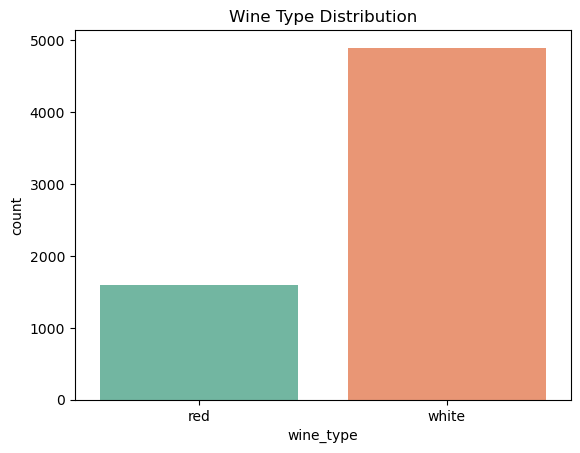

In [46]:
print("\nWine Type Counts:\n", df_filled['wine_type'].value_counts())
sns.countplot(x='wine_type', data=df_filled, palette='Set2')
plt.title('Wine Type Distribution')
plt.show()


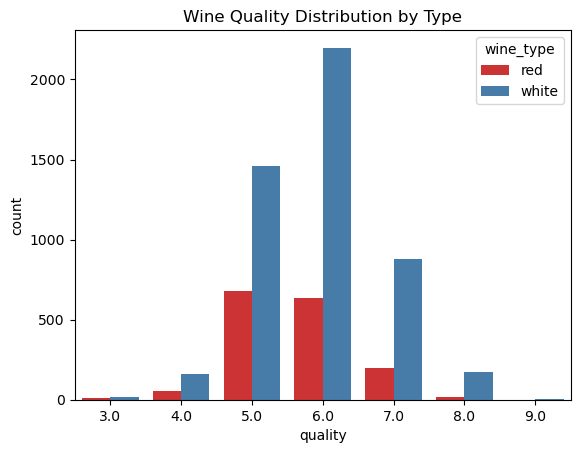

In [48]:
sns.countplot(x='quality', hue='wine_type', data=df_filled, palette='Set1')
plt.title('Wine Quality Distribution by Type')
plt.show()


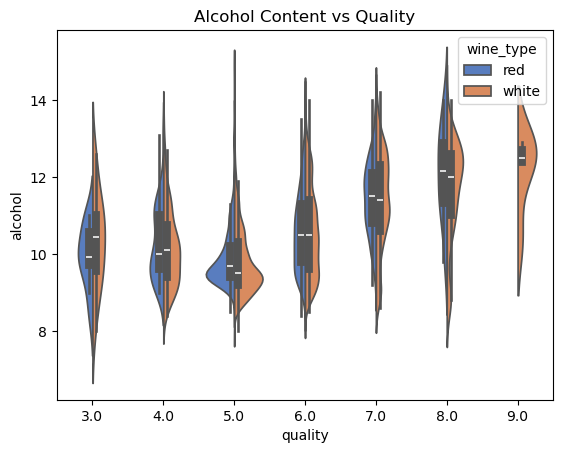

In [50]:
sns.violinplot(x='quality', y='alcohol', data=df_filled, hue='wine_type', split=True, palette='muted')
plt.title('Alcohol Content vs Quality')
plt.show()


C:\Users\KAMAL\AppData\Local\Temp\ipykernel_3508\2686191674.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='wine_type', y=feature, data=df_filled, palette='cool')
C:\Users\KAMAL\AppData\Local\Temp\ipykernel_3508\2686191674.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='wine_type', y=feature, data=df_filled, palette='cool')
C:\Users\KAMAL\AppData\Local\Temp\ipykernel_3508\2686191674.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='wine_type', y=feature, data=df_filled, palette='cool')
C:\Users\KAMAL\AppData\Local\Temp\ipy

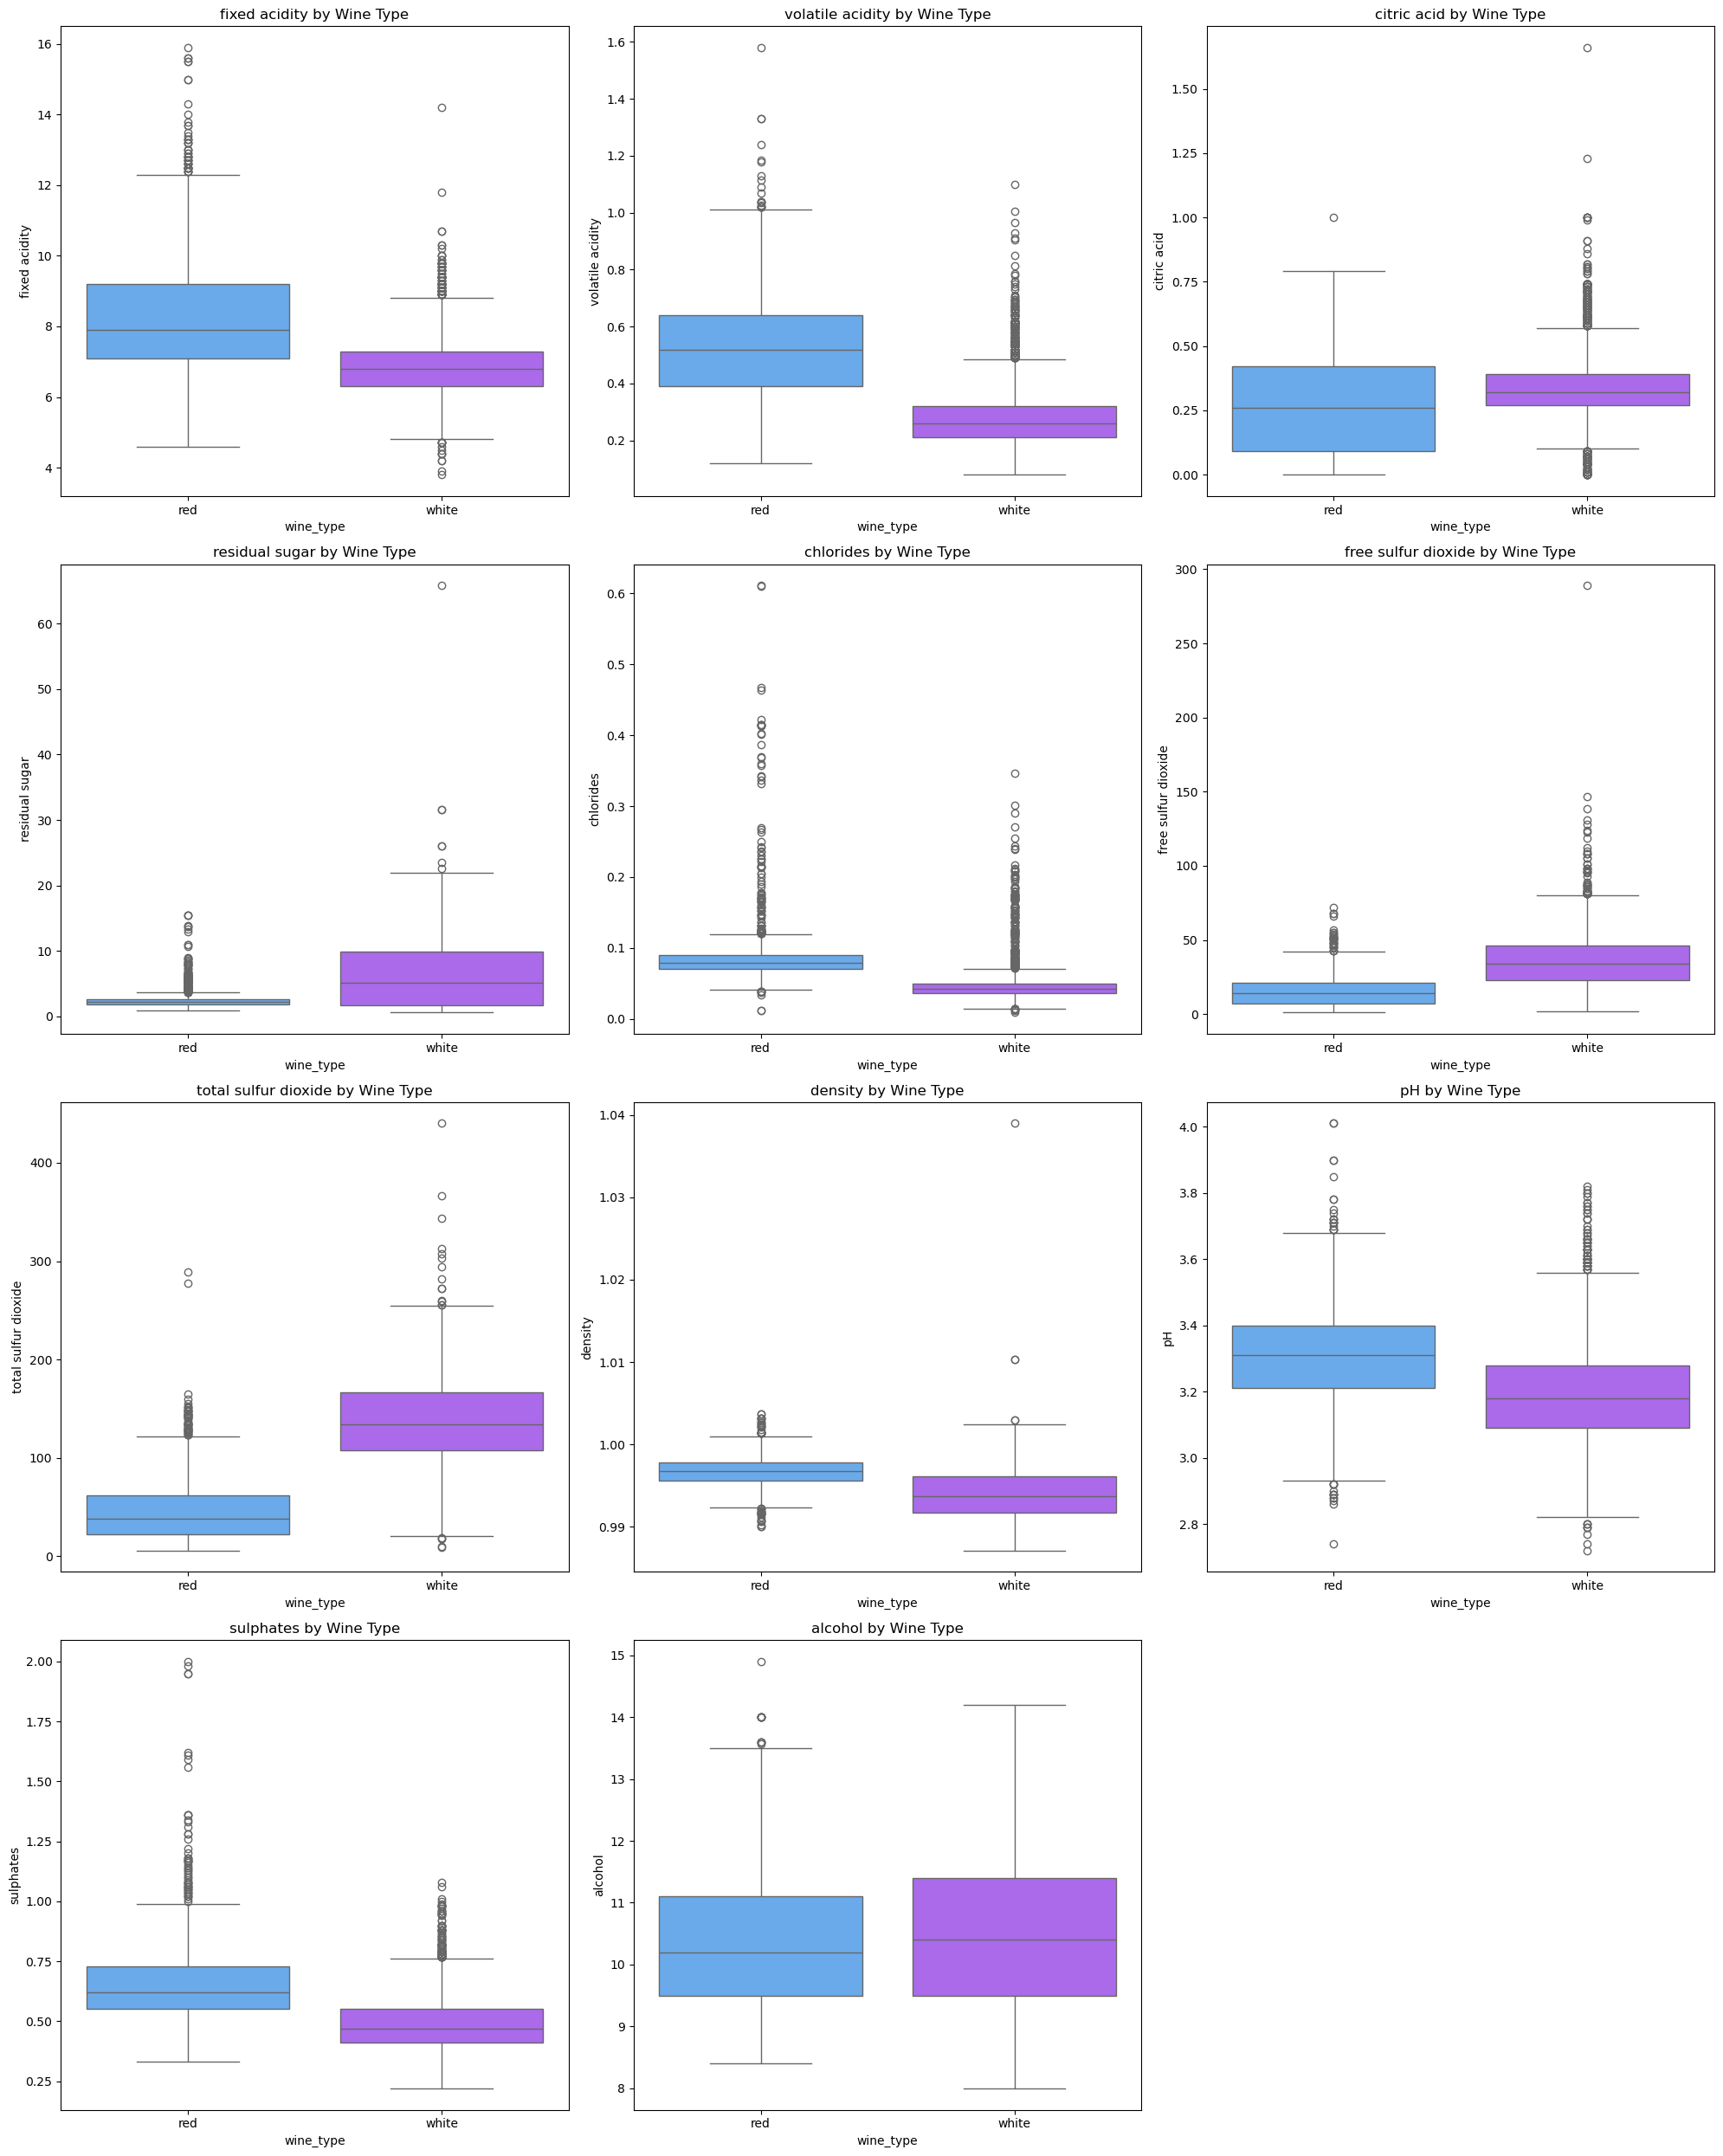

In [52]:
plt.figure(figsize=(20, 25))
features = df_filled.columns[:-2]
for i, feature in enumerate(features):
    plt.subplot(4, 3, i+1)
    sns.boxplot(x='wine_type', y=feature, data=df_filled, palette='cool')
    plt.title(f'{feature} by Wine Type')
plt.tight_layout()
plt.show()


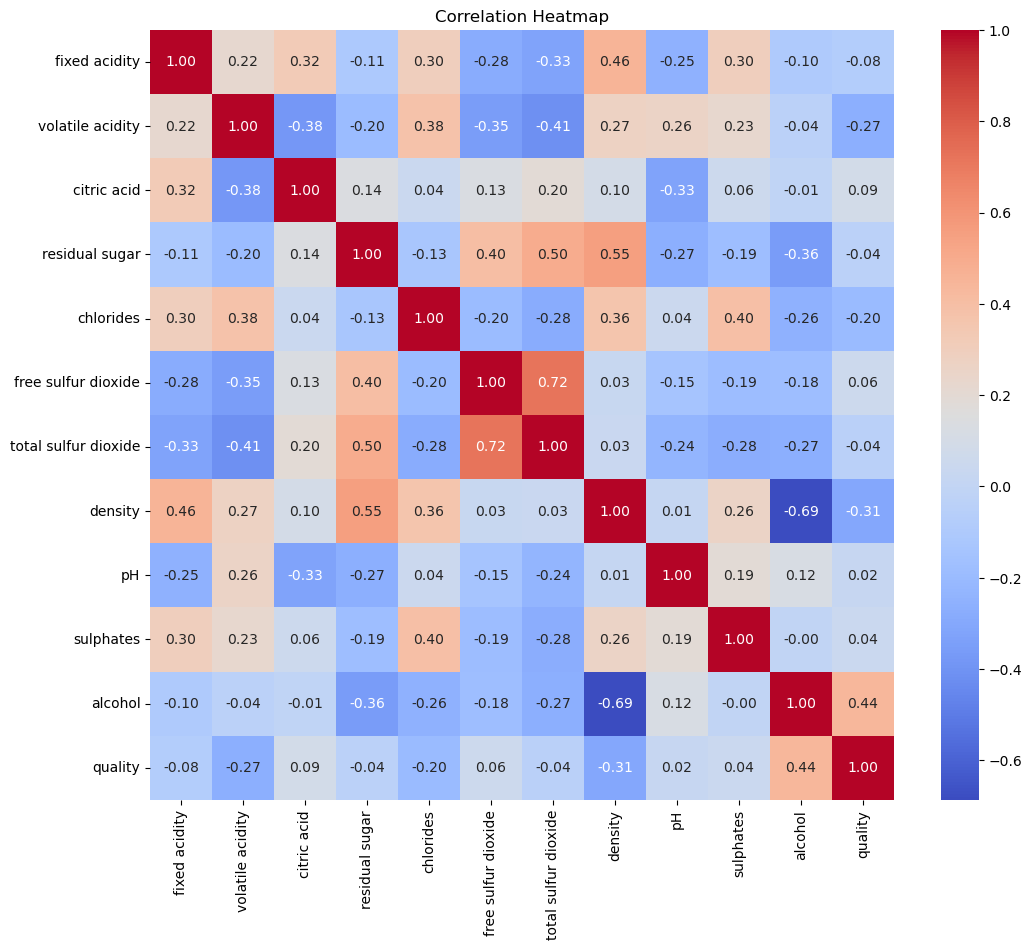

In [54]:
plt.figure(figsize=(12, 10))
sns.heatmap(df_filled.drop('wine_type', axis=1).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


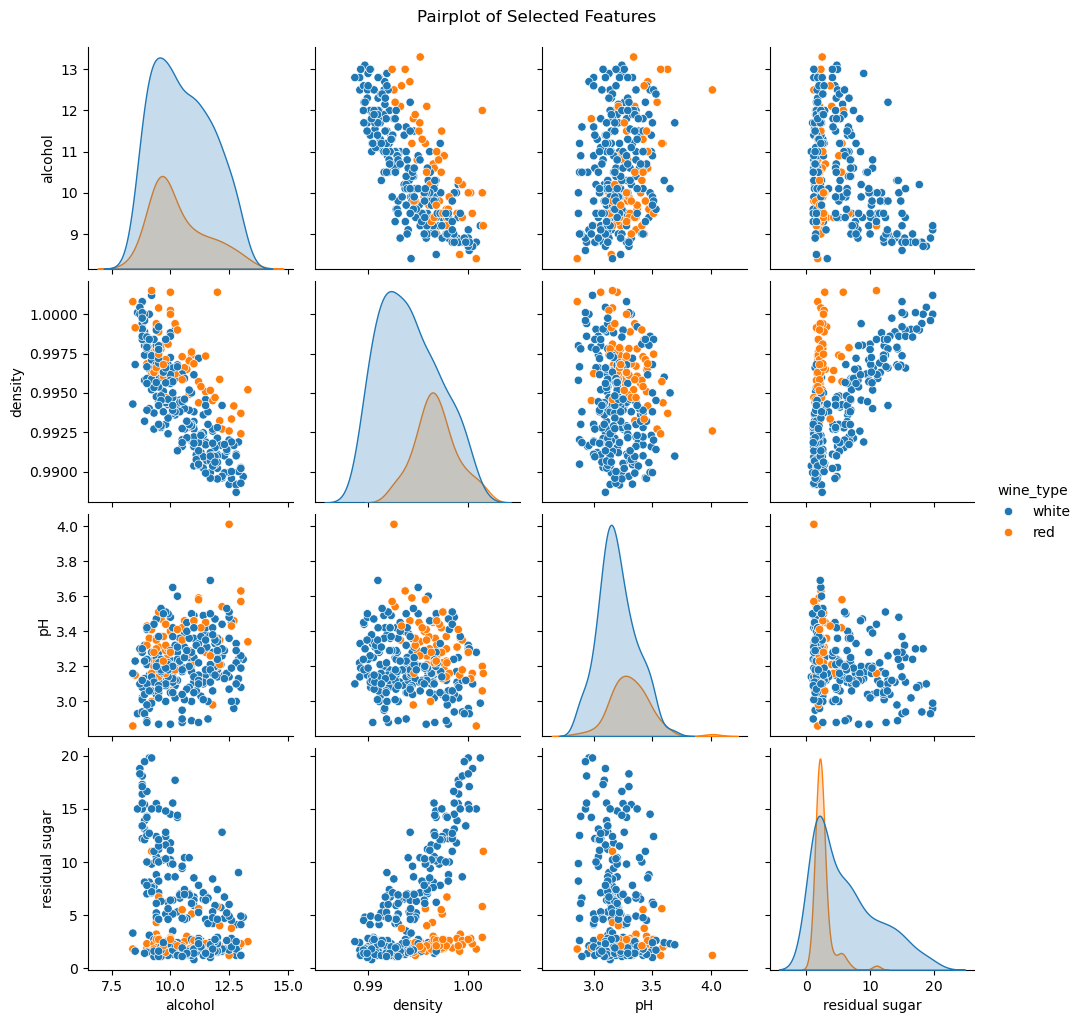

In [58]:
df_sample = df_filled.sample(300, random_state=42)
sns.pairplot(df_sample, hue='wine_type', vars=['alcohol', 'density', 'pH', 'residual sugar'])
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()
